In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 2.1

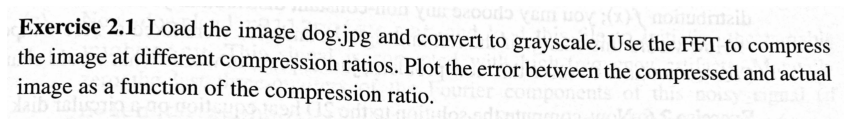

In [2]:
plt.figure(figsize=(15,5))
plt.imshow(plt.imread('./ex2.1.png'))
plt.axis('off');

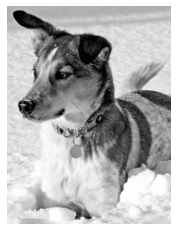

In [3]:
DOG = plt.imread('../DATA/dog.jpg')
DOG = np.mean(DOG, -1) #convert RGB to grayscale
plt.imshow(DOG, cmap='gray')
plt.axis('off');

In [4]:
DOG_fft = np.fft.fft2(DOG)
DOG_fftsort = np.sort(np.abs(DOG_fft.reshape(-1)))

In [11]:
error = []

for keep in range(1,101):
    thresh = DOG_fftsort[int(np.floor((1-keep/100)*len(DOG_fftsort)))]
    ind = np.abs(DOG_fft)>thresh          # Find small indices
    DOG_fftlow = DOG_fft * ind                 # Threshold small indices
    DOG_low = np.fft.ifft2(DOG_fftlow).real  # Compressed image
    error.append(((DOG - DOG_low)**2).mean())

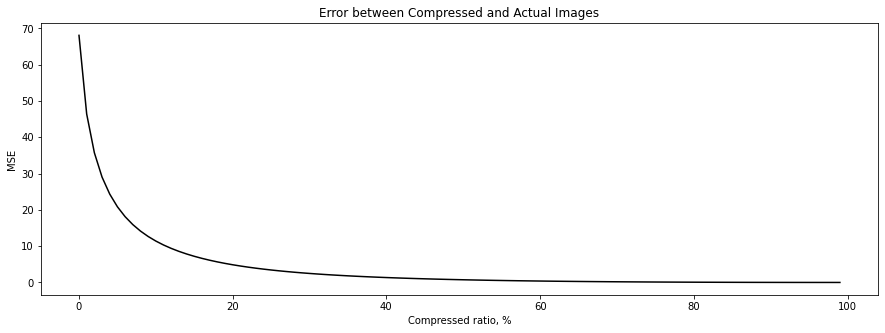

In [12]:
plt.figure(figsize=(15,5))
plt.plot(error, color='black')
plt.xlabel('Compressed ratio, %')
plt.ylabel('MSE')
plt.title('Error between Compressed and Actual Images');

# Exercise 2.2

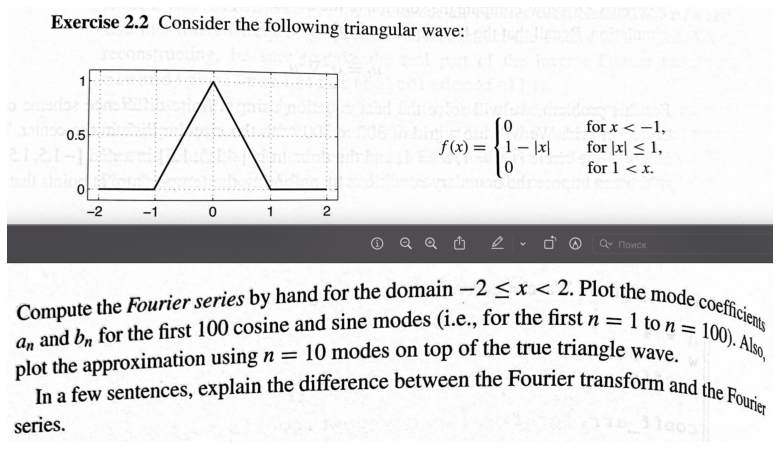

In [7]:
plt.figure(figsize=(15,8))
plt.imshow(plt.imread('./ex2.2.png'))
plt.axis('off');

# Here will be my hand calculations

# Here will be my explanation